In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import torch
import torch.nn as nn
from torch.autograd import Variable

In [2]:
df = pd.read_csv("./data/sbux.csv", index_col = "Date", parse_dates=True)
df.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-03-03,18.02,18.50,16.77,17.50,15459300,16.83
2008-01-02,18.97,19.35,17.75,17.98,13260300,17.29
2008-02-01,20.14,21.01,17.66,18.91,24534800,18.19
2007-03-12,23.23,23.43,19.89,20.47,12201200,19.69
2007-01-11,26.40,26.68,21.77,23.39,20232800,22.49


<AxesSubplot:title={'center':'Starbucks Stock Volume'}, xlabel='Date'>

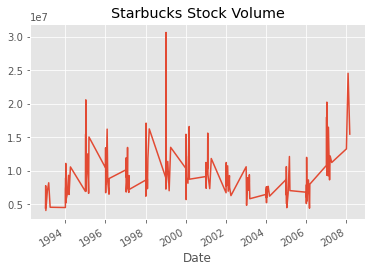

In [3]:
plt.style.use('ggplot')
df['Volume'].plot(label='CLOSE', title='Starbucks Stock Volume')

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, 5:6] 

In [5]:
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

In [6]:
X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_mm[:200, :]
y_test = y_mm[200:, :] 

In [46]:
# X_train = np.random.rand(181,120,5)
y_train=np.random.rand(83,1)
y_train.shape

(83, 1)

In [34]:
import numpy as np
store = np.load('./data/processed_eeg.npy')
store.shape

(83, 120, 4)

In [47]:
df = pd.read_csv('./data/df_onsite.csv')
lvo = df['lvo'].to_numpy()[:83]
lvo = lvo.reshape(lvo.shape[0],-1)
lvo.shape


(83, 1)

In [48]:
X_train_tensors = Variable(torch.Tensor(store))
# X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(lvo))
# y_test_tensors = Variable(torch.Tensor(y_test)) 

In [49]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 120, X_train_tensors.shape[2]))


# X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

In [50]:
X_train_tensors_final.size()

torch.Size([83, 120, 4])

In [51]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out
        

In [52]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 4 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [53]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 


In [54]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [55]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  print(outputs.size())
  print(y_train_tensors.size())
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

torch.Size([83, 1])
torch.Size([83, 1])
Epoch: 0, loss: 0.19650
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 1])
torch.Size([83, 

KeyboardInterrupt: 

In [20]:
df_X_ss = ss.transform(df.iloc[:, :-1]) #old transformers
df_y_mm = mm.transform(df.iloc[:, -1:]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

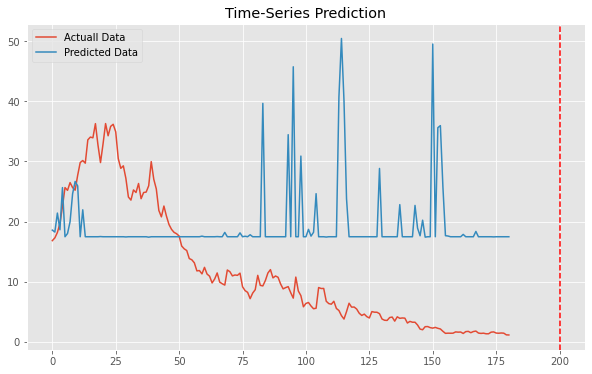

In [ ]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 